# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [6]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [7]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [8]:
print(f'Data row and col: {data.shape}')
print(f'Is data not clean? {data.isna().values.any()}')

Data row and col: (5391, 6)
Is data not clean? False


In [9]:
dup_row = data[data.duplicated()]
print(dup_row.shape)
dup_row[:3]

(0, 6)


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross


=> no duplicate

In [10]:
for col_name in data:
    print(type(data[col_name][0]))

<class 'numpy.int64'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [11]:
for col in data:
    if col != 'Rank' and col != 'Release_Date' and col != 'Movie_Title':
        data[col] = data[col].astype(str).str.replace(',', "")
        data[col] = data[col].astype(str).str.replace('$', "")
        data[col] = pd.to_numeric(data[col])

C:\Users\ez\AppData\Local\Temp/ipykernel_3344/1372497584.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[col] = data[col].astype(str).str.replace('$', "")


In [12]:
for col_name in data:
    print(type(data[col_name][0]))

<class 'numpy.int64'>
<class 'str'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [13]:
data.Release_Date = pd.to_datetime(data.Release_Date)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [15]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [16]:
print(f'1. The average production budget of the films in the data set: {round(data["USD_Production_Budget"].mean())}$\n')
print(f'2. The average worldwide gross revenue of films: {round(data["USD_Worldwide_Gross"].mean())}$\n')
print(f'3. The minimums for worldwide and domestic revenue: \n {data.loc[data["USD_Worldwide_Gross"].idxmin()]}\n')
print('4. The bottom 25% of films lose about 1.2 milions dollars.\n')
print(f'5. The highest production budget and highest worldwide gross revenue of any film: {data.loc[data["USD_Worldwide_Gross"].idxmax()]}\n')
a = data.USD_Production_Budget.idxmin()
print(f'6. Revenue the lowest budget films made: {data.USD_Worldwide_Gross[a] + data.USD_Domestic_Gross[a] - data.USD_Production_Budget[a]}$\n')
b = data.USD_Production_Budget.idxmax()
print(f'7. Revenue the highest budget films made: {data.USD_Worldwide_Gross[b] + data.USD_Domestic_Gross[b] - data.USD_Production_Budget[b]}$')

1. The average production budget of the films in the data set: 31113738$

2. The average worldwide gross revenue of films: 88855422$

3. The minimums for worldwide and domestic revenue: 
 Rank                                    5140
Release_Date             1916-05-09 00:00:00
Movie_Title                      Intolerance
USD_Production_Budget                 385907
USD_Worldwide_Gross                        0
USD_Domestic_Gross                         0
Name: 1, dtype: object

4. The bottom 25% of films lose about 1.2 milions dollars.

5. The highest production budget and highest worldwide gross revenue of any film: Rank                                       1
Release_Date             2009-12-18 00:00:00
Movie_Title                           Avatar
USD_Production_Budget              425000000
USD_Worldwide_Gross               2783918982
USD_Domestic_Gross                 760507625
Name: 3529, dtype: object

6. Revenue the lowest budget films made: 360982$

7. Revenue the highest budget

# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [17]:
zero_dom = data[data.USD_Domestic_Gross == 0]
zero_dom.sort_values('USD_Production_Budget', ascending=False)
print(zero_dom)

      Rank Release_Date                       Movie_Title  \
1     5140   1916-05-09                       Intolerance   
6     4630   1927-12-08                             Wings   
8     4240   1930-01-01                     Hell's Angels   
17    4814   1936-10-20  Charge of the Light Brigade, The   
27    4789   1941-10-28           How Green Was My Valley   
...    ...          ...                               ...   
5386  2950   2018-10-08                               Meg   
5387   126   2018-12-18                           Aquaman   
5388    96   2020-12-31                       Singularity   
5389  1119   2020-12-31            Hannibal the Conqueror   
5390  2517   2020-12-31    Story of Bonnie and Clyde, The   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  
1                    385907                    0                   0  
6                   2000000                    0                   0  
8                   4000000                    0      

**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [18]:
zero_world = data[data.USD_Worldwide_Gross == 0]
zero_world.sort_values('USD_Worldwide_Gross', ascending=False)
print(zero_world)

      Rank Release_Date                       Movie_Title  \
1     5140   1916-05-09                       Intolerance   
6     4630   1927-12-08                             Wings   
8     4240   1930-01-01                     Hell's Angels   
17    4814   1936-10-20  Charge of the Light Brigade, The   
27    4789   1941-10-28           How Green Was My Valley   
...    ...          ...                               ...   
5386  2950   2018-10-08                               Meg   
5387   126   2018-12-18                           Aquaman   
5388    96   2020-12-31                       Singularity   
5389  1119   2020-12-31            Hannibal the Conqueror   
5390  2517   2020-12-31    Story of Bonnie and Clyde, The   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  
1                    385907                    0                   0  
6                   2000000                    0                   0  
8                   4000000                    0      

### Filtering on Multiple Conditions

In [19]:
print('Highest budget film that had no revenue internationally.')
zero_world.loc[zero_world.USD_Domestic_Gross.idxmax()]

Highest budget film that had no revenue internationally.


Rank                                    5140
Release_Date             1916-05-09 00:00:00
Movie_Title                      Intolerance
USD_Production_Budget                 385907
USD_Worldwide_Gross                        0
USD_Domestic_Gross                         0
Name: 1, dtype: object

In [20]:
# Numpy bitwise operators.
bool_lists1 = [True, True, False, False]
bool_lists2 = [False, True, True, False]
np.array(bool_lists1) & np.array(bool_lists2)

array([False,  True, False, False])

In [21]:
internaltional_releases = data.loc[(data.USD_Domestic_Gross == 0) & (data.USD_Worldwide_Gross != 0)]
print(f"Number of internaltional releases: {internaltional_releases}")
internaltional_releases.head() 

Number of internaltional releases:       Rank Release_Date              Movie_Title  USD_Production_Budget  \
71    4310   1956-02-16                 Carousel                3380000   
1579  5087   2001-02-11  Everything Put Together                 500000   
1744  3695   2001-12-31                 The Hole                7500000   
2155  4236   2003-12-31                  Nothing                4000000   
2203  2513   2004-03-31                The Touch               20000000   
...    ...          ...                      ...                    ...   
5340  1506   2017-04-14      Queen of the Desert               36000000   
5348  2225   2017-05-05        Chāi dàn zhuānjiā               23000000   
5360  4832   2017-07-03                Departure                1100000   
5372  1856   2017-08-25                Ballerina               30000000   
5374  4237   2017-08-25     Polina danser sa vie                4000000   

      USD_Worldwide_Gross  USD_Domestic_Gross  
71              

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [23]:
international_releases = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
print(f'Number of international releases: {len(international_releases)}')
international_releases.tail()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [22]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [30]:
unreleases = data[data.Release_Date > scrape_date]
print(len(unreleases))
unreleases

7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [32]:
data_clean = data.drop(unreleases.index)

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [36]:
loose_film = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
len(loose_film)
print(f'Percentage of films where the production costs exceeded the worldwide fross revenue: {round((len(loose_film)/len(data_clean))*100, 2)}%')

Percentage of films where the production costs exceeded the worldwide fross revenue: 37.28%


# Seaborn for Data Viz: Bubble Charts

To style our chart we can simply configure the Axes object that is returned from sns.scatterplot().

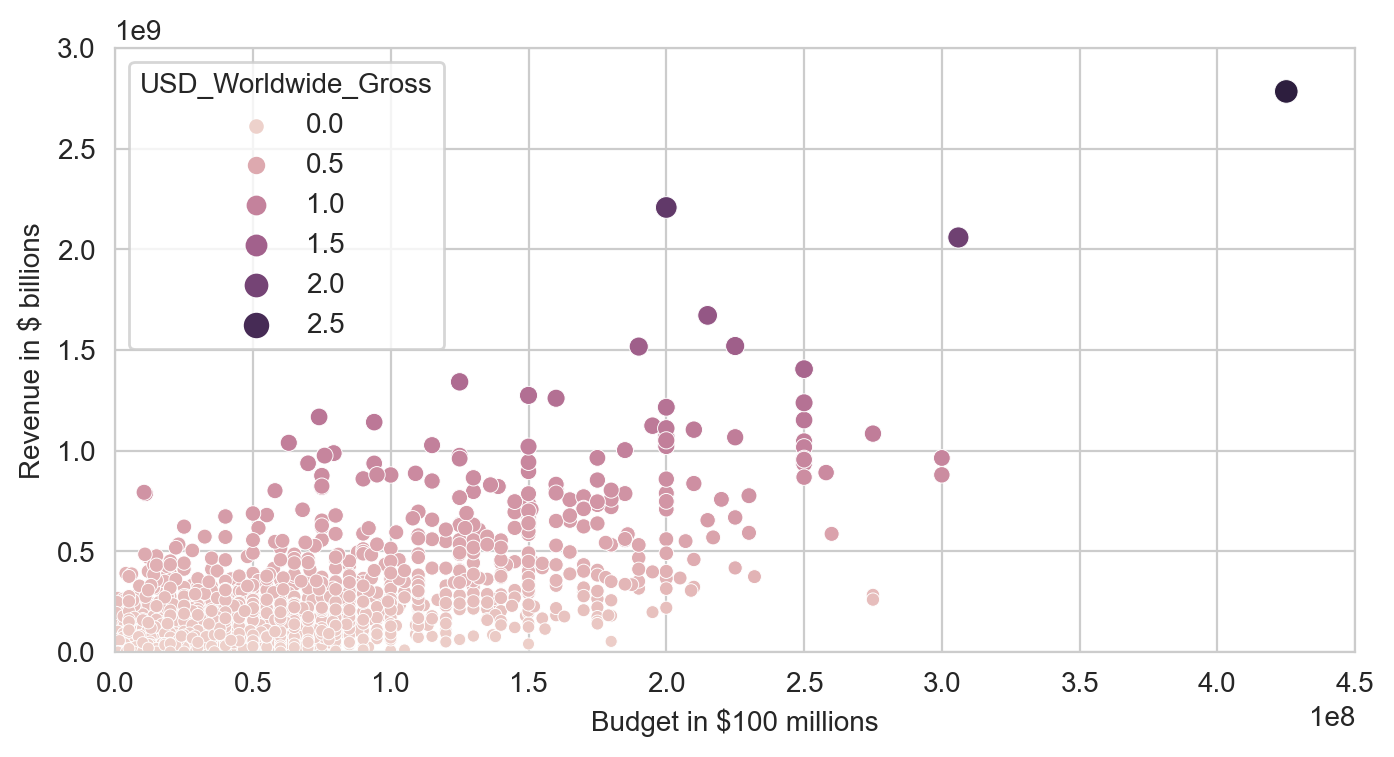

In [53]:
plt.figure(figsize=(8, 4), dpi=200)

sns.set_style('whitegrid')

ax = sns.scatterplot(data=data_clean,
                x='USD_Production_Budget', 
                y='USD_Worldwide_Gross',
                hue='USD_Worldwide_Gross',  # colour
                size='USD_Worldwide_Gross',) # dot size 

ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')

plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



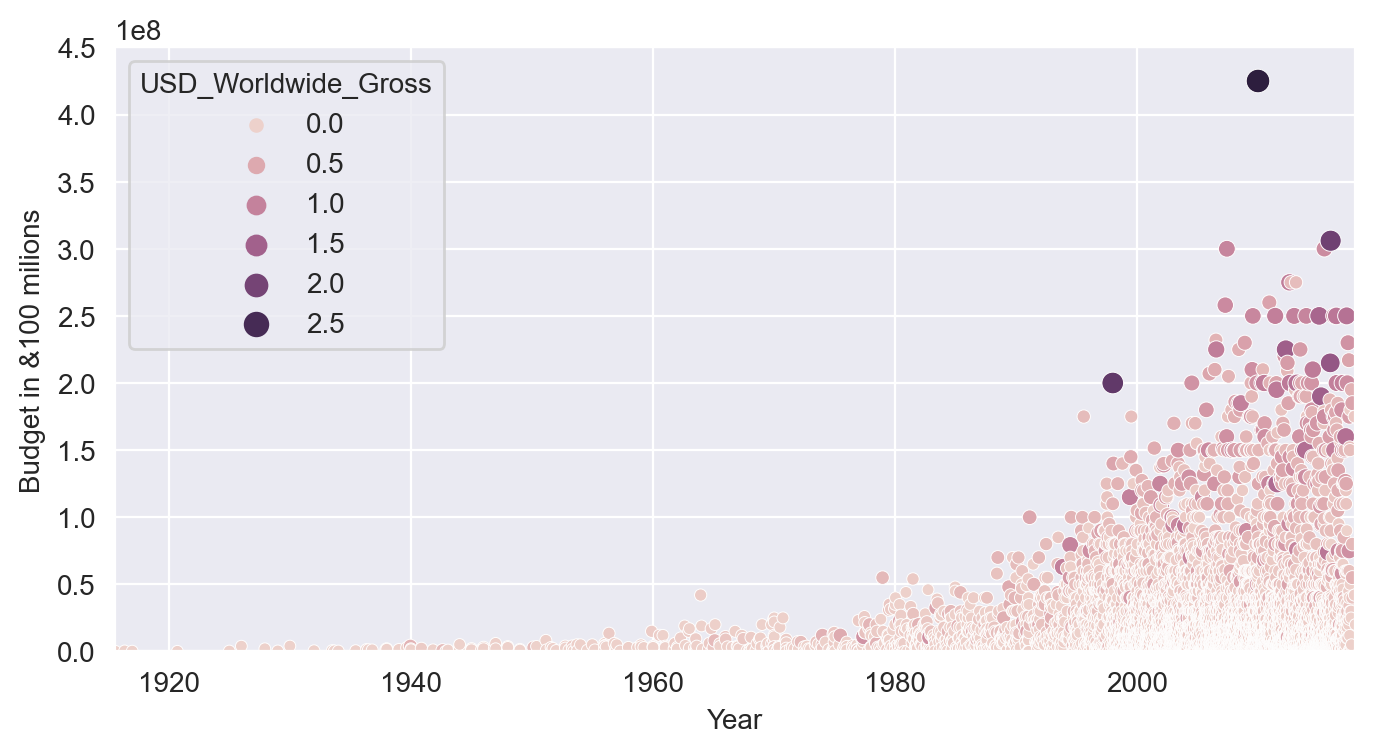

In [60]:
plt.figure(figsize=(8, 4), dpi=200)

sns.set_style('darkgrid')

ax = sns.scatterplot(
    data = data_clean,
    y = 'USD_Production_Budget',
    x = 'Release_Date',
    hue = 'USD_Worldwide_Gross',
    size = 'USD_Worldwide_Gross'
)

ax.set(
    ylim=(0, 450000000),
    xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
    ylabel='Budget in &100 milions',
    xlabel='Year'
)

plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [73]:
dt_index = pd.DatetimeIndex(data_clean.Release_Date)
years = dt_index.year

decades = years//10*10
data_clean['Decade'] = decades

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [75]:
old_films = data_clean.query('Decade < 1970')
new_films = data_clean.query('Decade >= 1970')

print(f'There were {len(old_films)} films released before 1970.')
print(f'The most expensive film before 1970 is: {old_films.Movie_Title[old_films.USD_Production_Budget.idxmax()]}.')

There were 153 films released before 1970.
The most expensive film before 1970 is: Cleopatra.


# Seaborn Regression Plots

Creates a scatter plot and draws a linear regression line together with the confidence interval at the same time.

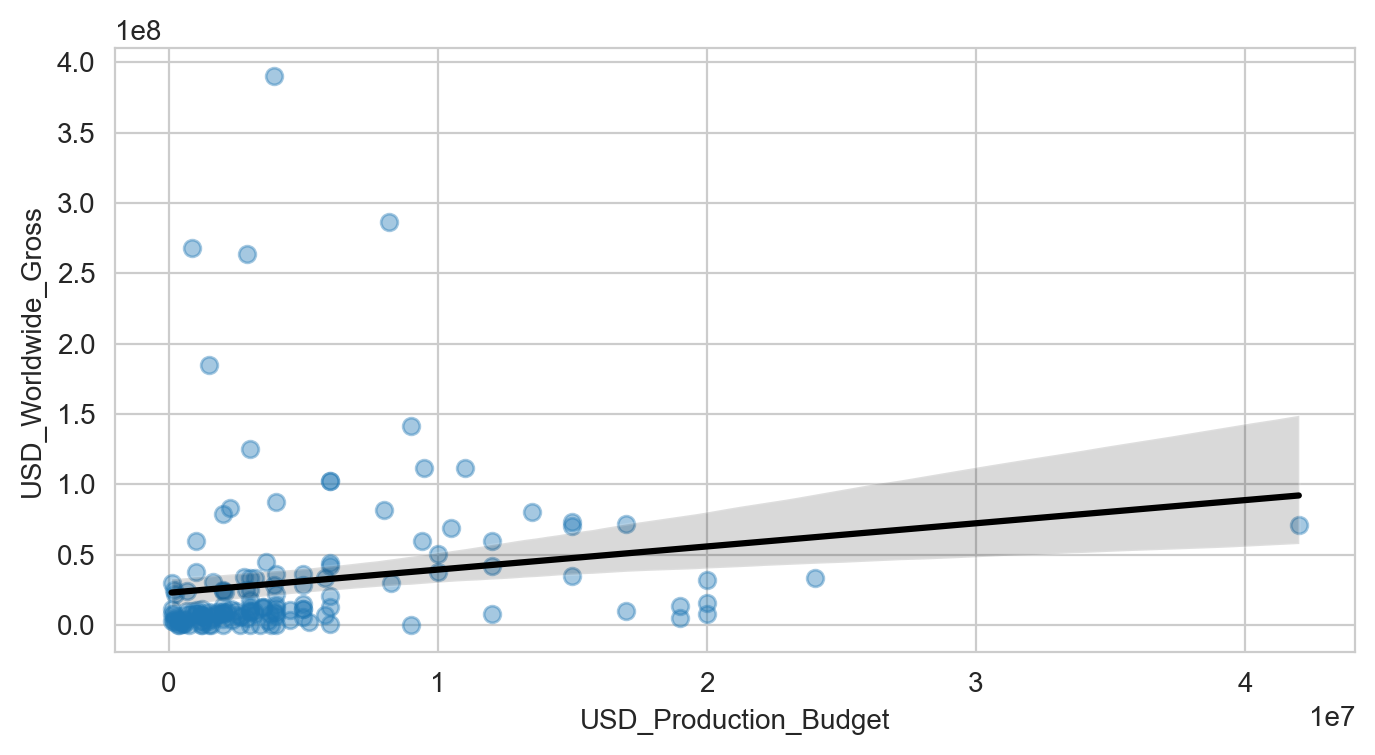

In [77]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

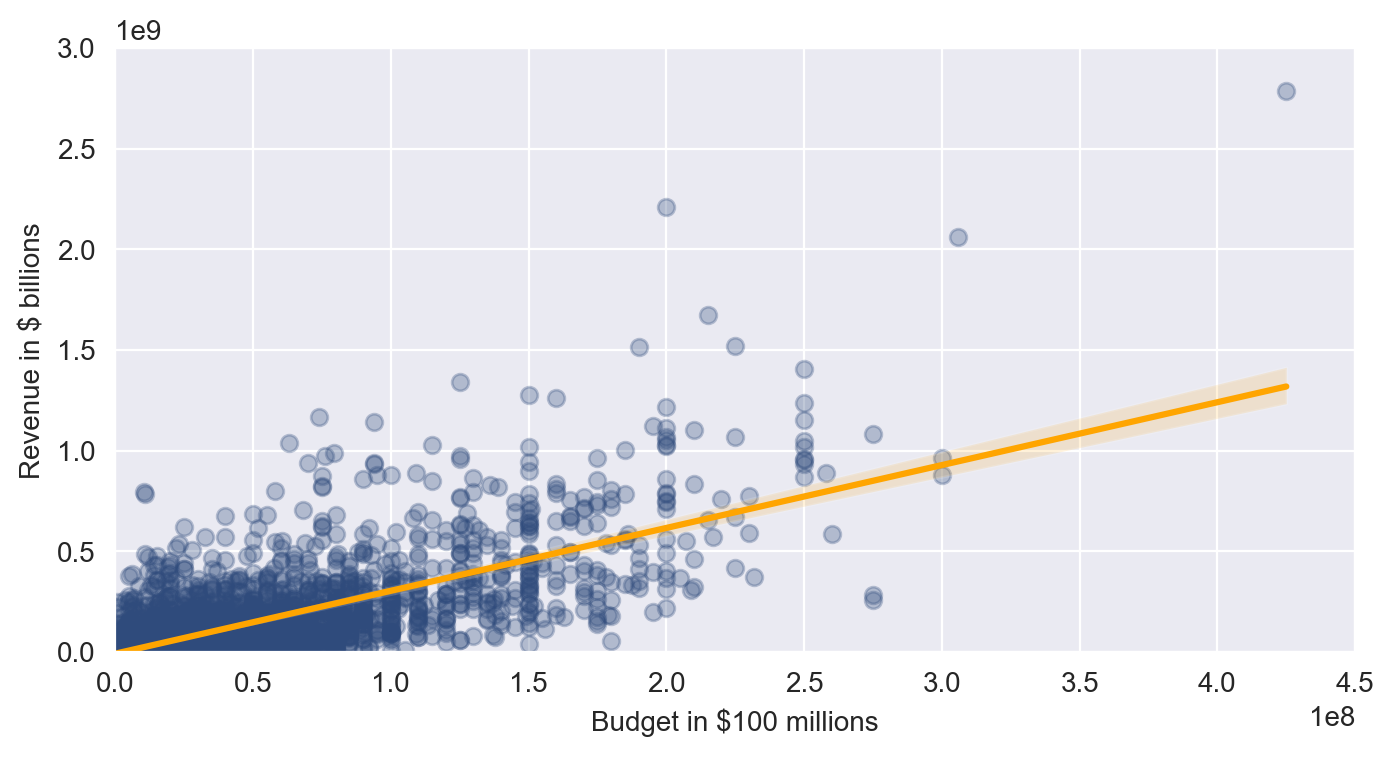

In [86]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
  ax = sns.regplot(
            data=new_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            color='#2f4b7c',
            scatter_kws = {'alpha': 0.3},
            line_kws = {'color': 'orange'})

  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions') 

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [94]:
regression = LinearRegression()

# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

# Find the best-fit line
regression.fit(X, y)

# Theta zero
print(regression.intercept_)

# Theta one
print(regression.coef_)

# R-squared
print(regression.score(X, y))

[-8650768.00661026]
[[3.12259592]]
0.5577032617720403


**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [98]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
# Response Variable or Target
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])

# Find the best-fit line
regression.fit(X, y)

# Theta zero
print(f'Intercept is: {regression.intercept_[0]}')
# Theta one
print(f'Slope coefficient is: {regression.coef_[0]}')
# R-squared
print(f'r-square is: {regression.score(X, y)}')

Intercept is: 22821538.635080382
Slope coefficient is: [1.64771314]
r-square is: 0.02937258620576877


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [100]:
22821538 + 1.64771314 * 350000000 

599521137.0

OR

In [99]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $600000000.0.


### ⚡ Learning Points & Summary

- Use nested loops to remove unwanted characters from multiple columns
- Filter Pandas DataFrames based on multiple conditions using both .loc[] and .query()
- Create bubble charts using the Seaborn Library
- Style Seaborn charts using the pre-built styles and by modifying Matplotlib parameters
- Use floor division (i.e., integer division) to convert years to decades
- Use Seaborn to superimpose a linear regressions over our data
- Make a judgement if our regression is good or bad based on how well the model fits our data and the r-squared metric
- Run regressions with scikit-learn and calculate the coefficients.